# Sentiment Analysis of twitter tweets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
from nltk.classify.scikitlearn import SklearnClassifier
import random
import pickle

In [3]:
df = pd.read_csv('../datasets/Tweets.csv') #https://www.kaggle.com/sbhatti/financial-sentiment-analysis
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


## Understanding the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

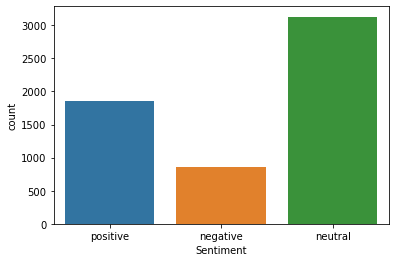

In [5]:
sns.countplot(data=df, x='Sentiment')

This shows we have 3 labels - Positive, negative and netural with maximum of neutral tweets.

## Basic NLTK to start building the model

In [7]:
documents = []
for ind in df.index:
    words = nltk.word_tokenize(df['Sentence'][ind])
    documents.append((words, df['Sentiment'][ind]))

In [8]:
all_words = []
for sentence in df['Sentence'].tolist():
    all_words += nltk.word_tokenize(sentence)

In [9]:
all_words = nltk.FreqDist(all_words)
all_words.most_common(20)

[('.', 5149),
 ('the', 4788),
 (',', 4782),
 ('of', 3312),
 ('in', 2900),
 ('to', 2755),
 ('and', 2492),
 ('a', 1769),
 ('$', 1321),
 ('The', 1309),
 ('for', 1283),
 ('EUR', 1189),
 ("'s", 1069),
 ('from', 944),
 ('is', 899),
 ('will', 800),
 ('on', 788),
 ('company', 762),
 ('mn', 729),
 (':', 720)]

In [10]:
len(all_words)

14887

In [11]:
word_features = list(all_words.keys())[:3000]

In [12]:
features_path = open("../models/word_features.pickle", "wb")
pickle.dump(word_features, features_path)
features_path.close()

In [13]:
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
         features[w] = (w in words)
    return features

In [14]:
featuresets = [(find_features(tweet), category) for (tweet, category) in documents]

In [15]:
total_len = len(featuresets)
print("Total Length:", total_len)
print("80% of the data is:", int(total_len*0.8))

Total Length: 5842
80% of the data is: 4673


In [16]:
training_set = featuresets[:4673]
testing_set = featuresets[4673:]

## Model testing

NLTK builtin naive bayes calssifier

In [17]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [16]:
print("Original Naive Bayes Algo accuracy percent: ", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

Original Naive Bayes Algo accuracy percent:  68.60564585115483
Most Informative Features
                    TSLA = True           negati : neutra =     58.3 : 1.0
                   lower = True           negati : positi =     54.8 : 1.0
                       X = True           negati : neutra =     41.0 : 1.0
                   https = True           negati : neutra =     36.7 : 1.0
                    grew = True           positi : neutra =     34.5 : 1.0
                    http = True           positi : neutra =     30.0 : 1.0
                    fell = True           negati : positi =     29.4 : 1.0
                       @ = True           negati : neutra =     29.3 : 1.0
                positive = True           positi : neutra =     27.7 : 1.0
                    AAPL = True           negati : neutra =     27.6 : 1.0
                    rose = True           positi : neutra =     26.6 : 1.0
                    down = True           negati : positi =     26.5 : 1.0
           

In [18]:
save_classifier = open("../models/naivebayes.pickle", "wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

In [19]:
# Loading the classifier
classifier_f = open("../models/naivebayes.pickle", 'rb')
classifier_orig = pickle.load(classifier_f)
classifier_f.close()

In [20]:
print("Loaded Naive Bayes Algo accuracy percent: ", (nltk.classify.accuracy(classifier_orig, testing_set))*100)
classifier_orig.show_most_informative_features(15)

Loaded Naive Bayes Algo accuracy percent:  68.60564585115483
Most Informative Features
                    TSLA = True           negati : neutra =     58.3 : 1.0
                   lower = True           negati : positi =     54.8 : 1.0
                       X = True           negati : neutra =     41.0 : 1.0
                   https = True           negati : neutra =     36.7 : 1.0
                    grew = True           positi : neutra =     34.5 : 1.0
                    http = True           positi : neutra =     30.0 : 1.0
                    fell = True           negati : positi =     29.4 : 1.0
                       @ = True           negati : neutra =     29.3 : 1.0
                positive = True           positi : neutra =     27.7 : 1.0
                    AAPL = True           negati : neutra =     27.6 : 1.0
                    rose = True           positi : neutra =     26.6 : 1.0
                    down = True           negati : positi =     26.5 : 1.0
             

In [21]:
classifier.classify(find_features('An EU proposal that would have banned the mining of energy-intensive cryptocurrencies such as Bitcoin failed in a committee vote, in what industry backers called a big win'))

'positive'

## Using Sklearn classifiers

In [4]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [5]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC

Multinominal Naive Bayes

In [22]:
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)

<SklearnClassifier(MultinomialNB())>

In [24]:
print("MNB_classifier accuracy percent: ", (nltk.classify.accuracy(MNB_classifier, testing_set))*100)

MNB_classifier accuracy percent:  69.20444824636441


Hyperparameter Tuning

In [25]:
accuracy_precentage = []
for a in [0, 0.01, 0.1, 0.5, 0.7, 0.9, 0.99, 1]:
    MNB_classifier = SklearnClassifier(MultinomialNB(alpha=a))
    MNB_classifier.train(training_set)
    accuracy_precentage.append(nltk.classify.accuracy(MNB_classifier, testing_set)*100)

C:\Users\nihal\Anaconda3\envs\MLprojects\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


In [26]:
accuracy_precentage

[65.52609067579127,
 67.06586826347305,
 68.17792985457656,
 68.26347305389223,
 68.17792985457656,
 69.0333618477331,
 69.11890504704876,
 69.20444824636441]

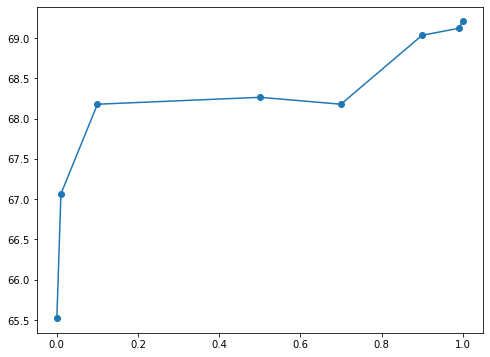

In [27]:
plt.figure(figsize=(8, 6))
plt.plot([0, 0.01, 0.1, 0.5, 0.7, 0.9, 0.99, 1], accuracy_precentage, marker='o')
plt.show()

In [28]:
save_classifier = open("../models/MNB_classifier.pickle", "wb")
pickle.dump(MNB_classifier, save_classifier)
save_classifier.close()

Bernoulli Naive Bayes

In [29]:
BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)

<SklearnClassifier(BernoulliNB())>

In [30]:
print("BernoulliNB_classifier accuracy percent: ", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

BernoulliNB_classifier accuracy percent:  68.77673224978615


In [31]:
save_classifier = open("../models/bernoulliNB_classifier.pickle", "wb")
pickle.dump(BernoulliNB_classifier, save_classifier)
save_classifier.close()

Logistic Regression

In [32]:
LogisticRegression_classifier = SklearnClassifier(LogisticRegression(max_iter=1000))
LogisticRegression_classifier.train(training_set)

<SklearnClassifier(LogisticRegression(max_iter=1000))>

In [33]:
print("LogisticRegression_classifier accuracy percent: ", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

LogisticRegression_classifier accuracy percent:  68.69118905047048


In [34]:
save_classifier = open("../models/LogisticRegression_classifier.pickle", "wb")
pickle.dump(LogisticRegression_classifier, save_classifier)
save_classifier.close()

SVC

In [35]:
SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(training_set)

<SklearnClassifier(SVC())>

In [36]:
print("SVC_classifier accuracy percent: ", (nltk.classify.accuracy(SVC_classifier, testing_set))*100)

SVC_classifier accuracy percent:  69.803250641574


In [37]:
save_classifier = open("../models/SVC_classifier.pickle", "wb")
pickle.dump(SVC_classifier, save_classifier)
save_classifier.close()

LinearSVC

In [38]:
LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)

<SklearnClassifier(LinearSVC())>

In [39]:
print("LinearSVC_classifier accuracy percent: ", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

LinearSVC_classifier accuracy percent:  65.35500427715996


In [40]:
save_classifier = open("../models/LinearSVC_classifier.pickle", "wb")
pickle.dump(LinearSVC_classifier, save_classifier)
save_classifier.close()

SGDClassifier

In [20]:
SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)

<SklearnClassifier(SGDClassifier())>

In [21]:
print("SGDClassifier_classifier accuracy percent: ", (nltk.classify.accuracy(SGDClassifier_classifier, testing_set))*100)

SGDClassifier_classifier accuracy percent:  65.61163387510693


In [23]:
save_classifier = open("../models/SGDClassifier_classifier.pickle", "wb")
pickle.dump(SGDClassifier, save_classifier)
save_classifier.close()

## Testing

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
bnb_classifier_f = open("../models/bernoulliNB_classifier.pickle", 'rb')
bnb_classifier = pickle.load(bnb_classifier_f)
bnb_classifier_f.close()

In [27]:
LinearSVC_classifier_f = open("../models/LinearSVC_classifier.pickle", 'rb')
LinearSVC_classifier = pickle.load(LinearSVC_classifier_f)
LinearSVC_classifier_f.close()

In [28]:
LogisticRegression_classifier_f = open("../models/LogisticRegression_classifier.pickle", 'rb')
LogisticRegression_classifier = pickle.load(LogisticRegression_classifier_f)
LogisticRegression_classifier_f.close()

In [29]:
mnb_classifier_f = open("../models/mnb_classifier.pickle", 'rb')
mnb_classifier = pickle.load(mnb_classifier_f)
mnb_classifier_f.close()

In [30]:
naivebayes_f = open("../models/naivebayes.pickle", 'rb')
naivebayes = pickle.load(naivebayes_f)
naivebayes_f.close()

In [31]:
SGDClassifier_classifier_f = open("../models/SGDClassifier_classifier.pickle", 'rb')
SGDClassifier_classifier = pickle.load(SGDClassifier_classifier_f)
SGDClassifier_classifier_f.close()

### Vote classifier

In [32]:
from nltk.classify import ClassifierI
from statistics import mode

In [33]:
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers
        
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)
    
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

In [38]:
voted_classifier = VoteClassifier(bnb_classifier,
                                  LinearSVC_classifier, 
                                  mnb_classifier, 
                                  LogisticRegression_classifier, 
                                  naivebayes,)

In [39]:
print("voted_classifier accuracy percent: ", (nltk.classify.accuracy(voted_classifier, testing_set))*100)

voted_classifier accuracy percent:  69.803250641574


In [55]:
print("Classification:", voted_classifier.classify(testing_set[0][0]), 
      "Confidence percent:", voted_classifier.confidence(testing_set[0][0]))

Classification: neutral Confidence percent: 1.0


In [66]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [48]:
from sklearn.metrics import confusion_matrix

In [58]:
y_pred = []
y_test = []
for test_set in testing_set:
    y_pred.append(voted_classifier.classify(test_set[0]))
    y_test.append(test_set[1])

In [62]:
print("Accuracy Score:", accuracy_score(y_test, y_pred)*100)

Accuracy Score: 69.803250641574


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.47      0.38      0.42       185
     neutral       0.76      0.80      0.78       614
    positive       0.68      0.69      0.68       370

    accuracy                           0.70      1169
   macro avg       0.64      0.62      0.63      1169
weighted avg       0.69      0.70      0.69      1169



<AxesSubplot:>

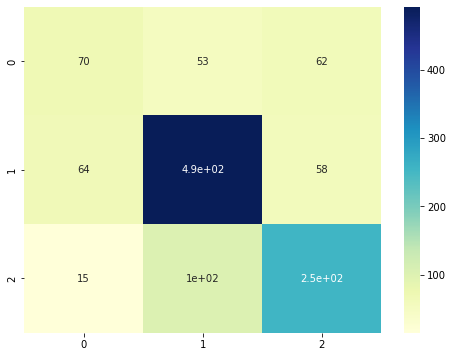

In [71]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")

## Validating the model using random crypto tweets on twitter

In [49]:
validation_feature_set = find_features('An EU proposal that would have banned the mining of energy-intensive cryptocurrencies such as Bitcoin failed in a committee vote, in what industry backers called a big win')

In [50]:
print("Classification:", voted_classifier.classify(validation_feature_set),
      "Confidence percent:", voted_classifier.confidence(validation_feature_set))

Classification: positive Confidence percent: 0.8


In [51]:
validation2 = find_features('South Koreans have elected a pro-crypto president who vows to deregulate the #crypto industry. #cryptocurrency #bitcoin $BTC')

In [52]:
print("Classification:", voted_classifier.classify(validation2),
      "\nConfidence percent:", voted_classifier.confidence(validation2))

Classification: positive 
Confidence percent: 1.0


# Find sentiment

In [53]:
def sentiment(classifier, text):
    feats = find_features(text)
    
    return (classifier.classify(feats), classifier.confidence(feats))

# Training on complete data for future deployment

In [54]:
classifier = nltk.NaiveBayesClassifier.train(featuresets)
save_classifier = open("../models/naivebayes_final.pickle", "wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

In [55]:
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(featuresets)
save_classifier = open("../models/MNB_classifier_final.pickle", "wb")
pickle.dump(MNB_classifier, save_classifier)
save_classifier.close()

In [56]:
BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(featuresets)
save_classifier = open("../models/bernoulliNB_classifier_final.pickle", "wb")
pickle.dump(BernoulliNB_classifier, save_classifier)
save_classifier.close()

In [57]:
LogisticRegression_classifier = SklearnClassifier(LogisticRegression(max_iter=1000))
LogisticRegression_classifier.train(featuresets)
save_classifier = open("../models/LogisticRegression_classifier_final.pickle", "wb")
pickle.dump(LogisticRegression_classifier, save_classifier)
save_classifier.close()

In [58]:
SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(training_set)
save_classifier = open("../models/SVC_classifier_final.pickle", "wb")
pickle.dump(SVC_classifier, save_classifier)
save_classifier.close()